# Support Vector Machine (SVM)

SVM is a popular supervised machine learning algorithm used for solving classification, regression, and outlier detection problems.

## How SVM Works

The primary goal of SVM is to find the best decision boundary (called a **hyperplane**) that separates data points in an n-dimensional space into distinct classes. Once the hyperplane is determined, new data points can be categorized correctly.

### Key Concepts:

1. **Hyperplane:**
    - A hyperplane is the decision boundary that separates classes.
    - There can be multiple potential hyperplanes, but SVM finds the one with the maximum margin.

2. **Margin:**
    - The margin is the distance between the hyperplane and the nearest data points from both classes.
    - A larger margin implies better generalization.

3. **Support Vectors:**
    - The data points closest to the hyperplane are called support vectors.
    - These points are crucial as they influence the position and orientation of the hyperplane.

4. **Optimal Hyperplane:**
    - The hyperplane with the maximum margin is known as the optimal hyperplane.


### Example:
Imagine encountering an unusual animal with characteristics of both a cat and a dog. To classify it:
- We first train the SVM model using a dataset of labeled cat and dog images.
- SVM identifies the distinguishing features and establishes a decision boundary (hyperplane).
- Using support vectors (extreme data points), the model determines whether this animal is more similar to a cat or a dog.

## Types of SVM

1. **Linear SVM:**
    - Used when the data is linearly separable (e.g., cats vs. dogs).
    - The classes can be divided using a straight line (or a flat hyperplane in higher dimensions).

2. **Non-linear SVM:**
    - Used for more complex datasets that are not linearly separable.
    - SVM uses a technique called the **kernel trick** to transform the data into a higher-dimensional space, making it separable.

### SVM for Nonlinear Data:
#### Kernel Trick (Optional):
Sometimes, the neighborhoods might not be easily separable with a straight line. The kernel trick (kernel function to transform the 2D non-linear data to higher dimension) is like lifting the houses into 3D space and finding a plane that separates them. Then, project this plane back to 2D, and it might look like a non-linear boundary.

There are different types of kernels we use, some of them are:
- Polynomial kernel
- Gaussian kernel
- Gaussian radial basis function (RBF) kernel
- Laplace RBF kernel

## Assumptions:
- SVMs are memory efficient as the support vectors are used for decision making.
- The choice of kernel function and its parameters can affect the output. The appropriate kernel depends on the characteristics of the data.
- SVMs are sensitive to noisy data as the outliers can affect the decision boundary.
- SVM aims to find the hyperplane that maximizes the margin between classes. This assumes that a larger margin contributes to better generalization and improved performance.
- The main assumption of SVM is that the data is, or can be transformed into, a space where it can be separated by a straight line. In other words, there is a hyperplane that can clearly divide the different classes.

## Advantages:
- SVMs work well when there is a clear margin of separation between classes.
- SVMs are less prone to overfitting, especially in high-dimensional spaces, due to the use of a margin that penalizes data points inside the margin.
- SVMs perform well in high-dimensional spaces, making them suitable for tasks with a large number of features.
- The kernel trick allows SVMs to handle non-linear decision boundaries by implicitly mapping data into higher-dimensional spaces.
- SVMs support different kernel functions, providing flexibility in capturing different types of relationships in the data.
- SVMs use a subset of training points (support vectors) in decision-making, making them memory-efficient, especially when dealing with large datasets.

## Disadvantages:
- SVMs are sensitive to noisy data as the outliers can affect the decision boundary.
- SVMs can become computationally expensive and memory-intensive, particularly with large datasets.
- The choice of the appropriate kernel and tuning of hyperparameters can be challenging, and the performance may be sensitive to these choices.
- The decision function of SVMs is not easily interpretable, making it challenging to understand the contribution of each feature to the final decision.
- SVMs may not perform well on highly imbalanced datasets.
- SVMs are inherently binary classifiers, meaning they are designed to classify data into two categories. To handle multiclass problems, extensions are required, such as **one-vs-one** or **one-vs-all** strategies.

    - **One-vs-One (OvO):** In this approach, a separate classifier is trained for each pair of classes. For example, if there are three classes (A, B, C), three classifiers will be created: A vs B, B vs C, and A vs C. The final prediction is made by a majority vote from all classifiers.

    - **One-vs-All (OvA):** In this approach, a separate classifier is trained for each class, where each classifier tries to distinguish one class from all the others. For three classes (A, B, C), three classifiers will be created: A vs (B+C), B vs (A+C), and C vs (A+B). The final prediction is made based on which classifier has the highest confidence for a given input.


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [27]:
df=sns.load_dataset('iris')

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
X=df.drop('species',axis=1)
y=df['species']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
model=SVC()
# model=model = SVC(C=1.0, kernel='rbf', gamma='scale', degree=3, probability=True, class_weight='balanced', tol=0.001, max_iter=-1)

In [32]:
model.fit(X_train,y_train)


SVC()

In [33]:
y_pred=model.predict(X_test)

In [34]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

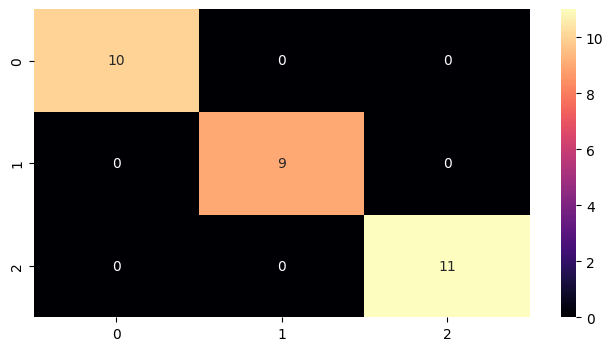

In [35]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='magma')

The classification model achieved perfect performance across all three classes (**setosa**, **versicolor**, and **virginica**). The **precision**, **recall**, and **F1-score** for each class are all **1.00**, indicating that the model correctly classified all instances without any errors.

The overall **accuracy** is also **1.00**, meaning the model correctly predicted all 30 samples. Both the **macro** and **weighted averages** of precision, recall, and F1-score are **1.00**, further confirming the model's flawless performance.
